### Name: Success Ologunsua

### Username: TheSussex

# DSN AI Bootcamp Qualification Hackathon by Data Science Nigeria

### Kowope Mart Credit Default Prediction

Kowope Mart is a Nigerian-based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall. 

To achieve this, the company has partnered with DSBank on co-branded credit card with additional functionality such that customers can request for loan, pay for goods even with zero-balance and then pay back within an agreed period of time. 

This innovative strategy has increased sales for the company. However, there has been recent cases of credit defaults and Kowope Mart will like to have a system that profiles customers who are worthy of the card with minimum if not zero risk of defaulting.


In this notebook, I will attempt to predict the probability of customers who are likely to default or not using machine learning


This is Qualification Competition for the Data Science Nigeria AI Bootcamp.

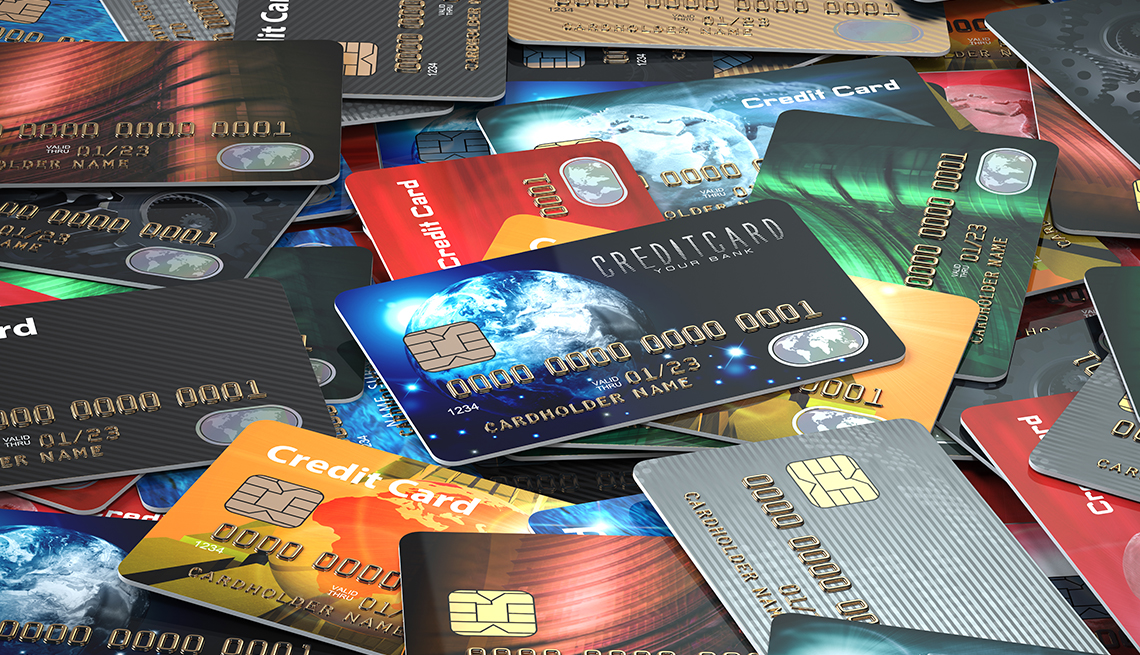

In [1]:
# importing necessary python libraries      

import pandas as pd                  # for data manipulation

import numpy as np                   # for mathematical calculations

import seaborn as sns                # for data visualization

import matplotlib.pyplot as plt      # for plotting graphs

%matplotlib inline                   
# "%matplotlib inline" ensures commands in cells below the cell that outputs a plot does not affect the plot
    
import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")


### Data Understanding and Cleaning

In [2]:
# loading and previewing train dataset


train = pd.read_csv('Train.csv')
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [3]:
# loading and previewing test dataset

test = pd.read_csv('Test.csv')
test.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [4]:
# let's check the no of rows and columns in each dataframe

print('There are', train.shape[0], 'rows and', train.shape[1], 'columns in the train dataset')

print('There are', test.shape[0], 'rows and', test.shape[1], 'columns in the train dataset')

There are 56000 rows and 52 columns in the train dataset
There are 24000 rows and 51 columns in the train dataset


In [5]:
# Now let's get a quick overview of the dataframes 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Applicant_ID  24000 non-null  object 
 1   form_field1   22890 non-null  float64
 2   form_field2   22291 non-null  float64
 3   form_field3   23854 non-null  float64
 4   form_field4   23854 non-null  float64
 5   form_field5   23854 non-null  float64
 6   form_field6   18396 non-null  float64
 7   form_field7   21769 non-null  float64
 8   form_field8   18396 non-null  float64
 9   form_field9   20600 non-null  float64
 10  form_field10  23853 non-null  float64
 11  form_field11  10602 non-null  float64
 12  form_field12  19817 non-null  float64
 13  form_field13  21537 non-null  float64
 14  form_field14  24000 non-null  int64  
 15  form_field15  14408 non-null  float64
 16  form_field16  18526 non-null  float64
 17  form_field17  19305 non-null  float64
 18  form_field18  19631 non-nu

From the outputs above, we see that:
    
    . There are 56,000 observations/rows and 52 columns in the train data
    . There are 24,000 rows of data and 51 columns(excluding the target variable) in the test data
    . Of the 52 columns, 3 columns(Applicant_ID, form_field47 & default_status) have the object data type, this needs to be changed because machine learning algorithms require their inputs to be of numeric types.

In [7]:
# random sampling of the form_field47 and default_status columns

train[[ 'default_status', 'form_field47']].sample(10)

,default_status,form_field47
22665,no,charge
7433,no,charge
4657,no,lending
1437,yes,lending
46008,no,charge
42802,no,charge
24564,no,charge
22394,no,charge
37596,no,charge
20437,no,charge


We see that the default_status column has 2 different values; yes, no. The mising values will be handled.

form_field47 has 2 values; charge, lending


In [8]:
# Changing datatypes for the above-mentioned columns

train['default_status'] = train['default_status'].astype('category').cat.codes

train['form_field47'] = train['form_field47'].astype('category').cat.codes

test['form_field47'] = test['form_field47'].astype('category').cat.codes

In [9]:
train['form_field47'].value_counts()

0    36373
1    19627
Name: form_field47, dtype: int64

In [10]:
train['default_status'].value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

In [11]:
# Checking to see if the data types has changed

train.dtypes
test.dtypes

Applicant_ID     object
form_field1     float64
form_field2     float64
form_field3     float64
form_field4     float64
form_field5     float64
form_field6     float64
form_field7     float64
form_field8     float64
form_field9     float64
form_field10    float64
form_field11    float64
form_field12    float64
form_field13    float64
form_field14      int64
form_field15    float64
form_field16    float64
form_field17    float64
form_field18    float64
form_field19    float64
form_field20    float64
form_field21    float64
form_field22    float64
form_field23    float64
form_field24    float64
form_field25    float64
form_field26    float64
form_field27    float64
form_field28    float64
form_field29    float64
form_field30    float64
form_field31    float64
form_field32    float64
form_field33    float64
form_field34    float64
form_field35    float64
form_field36    float64
form_field37    float64
form_field38    float64
form_field39    float64
form_field40    float64
form_field41    

In [ ]:
# Checking for null values

train.isnull().sum()

In [12]:
test.isnull().sum()

Applicant_ID        0
form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field

In [13]:
# replacing the null values

train.fillna(-999, inplace=True, axis=1)
test.fillna(-999, inplace=True, axis=1)

In [14]:
# cross-checking null values

train.isnull().sum()
test.isnull().sum()

Applicant_ID    0
form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64

In [22]:
# checking correlation of features with target variable

train.corr()['default_status']

form_field1      -0.140965
form_field2       0.073846
form_field3       0.009359
form_field4       0.009983
form_field5       0.015713
form_field6      -0.173197
form_field7      -0.120380
form_field8      -0.238216
form_field9      -0.228493
form_field10     -0.169563
form_field11      0.104666
form_field12     -0.088259
form_field13     -0.091342
form_field14      0.008272
form_field15     -0.117442
form_field16     -0.207761
form_field17     -0.213428
form_field18     -0.218131
form_field19      0.026958
form_field20      0.007007
form_field21     -0.135646
form_field22      0.134407
form_field23      0.129677
form_field24     -0.128646
form_field25     -0.252104
form_field26     -0.237164
form_field27     -0.234193
form_field28     -0.219221
form_field29     -0.205897
form_field30     -0.101069
form_field31      0.054845
form_field32     -0.254526
form_field33     -0.032960
form_field34      0.005449
form_field35     -0.031519
form_field36      0.040382
form_field37     -0.167874
f

### Modeling and Prediction

In [23]:
# We'll drop the Applicant_ID columnn because it's not relevant to the model
  
train.drop('Applicant_ID', inplace=True, axis=1)

test.drop('Applicant_ID', inplace=True, axis=1)

In [24]:
train.drop(['form_field48', 'form_field49'], inplace=True, axis=1)

test.drop(['form_field48', 'form_field49'], inplace=True, axis=1)


In [25]:
# Confirming that the columns have been dropped

train.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field14', 'form_field15', 'form_field16',
       'form_field17', 'form_field18', 'form_field19', 'form_field20',
       'form_field21', 'form_field22', 'form_field23', 'form_field24',
       'form_field25', 'form_field26', 'form_field27', 'form_field28',
       'form_field29', 'form_field30', 'form_field31', 'form_field32',
       'form_field33', 'form_field34', 'form_field35', 'form_field36',
       'form_field37', 'form_field38', 'form_field39', 'form_field40',
       'form_field41', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field47', 'form_field50',
       'default_status'],
      dtype='object')

In [37]:
attributes = train.select_dtypes(exclude = object).columns.drop(['default_status'])


X = train[attributes]
y = train['default_status']

In [32]:
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier



cb_classifier = CatBoostClassifier(n_estimators=3000,
                                   learning_rate=0.01, 
                                   depth=7, 
                                   early_stopping_rounds=200,
                                   eval_metric='AUC',
                                   random_seed=2050,    
                                   use_best_model=True,
                                   objective='CrossEntropy', )

In [33]:
from sklearn.model_selection import StratifiedKFold


no_of_skf = 10  #no of folds

skf = StratifiedKFold(no_of_skf)

In [34]:
def eval_metric(y, pred):
    return roc_auc_score(y, pred, labels=[0, 1])

In [38]:
score = 0

score_list = []

test_folds = []

for i, (train_index, vr_index) in enumerate(skf.split(X, y)):
    
    X_train, y_train = X.loc[train_index, attributes], y.loc[train_index]
    
    X_val, y_val = X.loc[vr_index, attributes], y.loc[vr_index]

   
    cb_classifier.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=1000)
    
    pred = cb_classifier.predict_proba(X_val)[:, 1]
    
    sc = eval_metric(y_val, pred)
    
    score_list.append(sc)
    
    score += sc/no_of_skf
    
    predictions_probability = cb_classifier.predict_proba(test[attributes])[:,1]
    
    test_folds.append(predictions_probability)

    print('Fold {} : {}'.format(i, sc))


print()
print('Average:', score)

0:	test: 0.7949123	best: 0.7949123 (0)	total: 621ms	remaining: 31m 2s
1000:	test: 0.8302589	best: 0.8302656 (996)	total: 1m 57s	remaining: 3m 55s
2000:	test: 0.8327593	best: 0.8327656 (1994)	total: 4m	remaining: 1m 59s
2999:	test: 0.8337444	best: 0.8338196 (2988)	total: 5m 58s	remaining: 0us

bestTest = 0.8338196251
bestIteration = 2988

Shrink model to first 2989 iterations.
Fold 0 : 0.833819625147401
0:	test: 0.8106534	best: 0.8106534 (0)	total: 155ms	remaining: 7m 44s
1000:	test: 0.8468711	best: 0.8468711 (1000)	total: 1m 59s	remaining: 3m 57s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8483073095
bestIteration = 1760

Shrink model to first 1761 iterations.
Fold 1 : 0.8483073095204708
0:	test: 0.8060281	best: 0.8060281 (0)	total: 159ms	remaining: 7m 56s
1000:	test: 0.8403644	best: 0.8403644 (1000)	total: 2m 7s	remaining: 4m 15s
2000:	test: 0.8418431	best: 0.8418991 (1994)	total: 4m 10s	remaining: 2m 5s
Stopped by overfitting detector  (200 iterations wait)



In [39]:
fold_predictions = pd.DataFrame(test_folds).T

In [40]:
fold_predictions.columns = ['fold_'+ str(i) for i in range(1, no_of_skf + 1)]

In [41]:
submission = pd.read_csv('SampleSubmission.csv')

In [43]:
# taking the mean of the fold predictions

submission['default_status'] = np.mean(test_folds, axis = 0) 

In [44]:
submission.to_csv('TheSussex_Kowope_Final_Submission', index=False)